# Exploratory Data Analysis of Kaggle Breast Cancer Proteomes as a Biologist

### Downloading the Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
#### import dataset
dataset_url = 'https://www.kaggle.com/piotrgrabo/breastcancerproteomes' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anubratadas
Your Kaggle Key: ········


100%|██████████| 5.27M/5.27M [00:00<00:00, 40.0MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './breastcancerproteomes'

In [5]:
import os
os.listdir(data_dir)

['77_cancer_proteomes_CPTAC_itraq.csv',
 'clinical_data_breast_cancer.csv',
 'PAM50_proteins.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "breast_cancer_proteomes_4"

In [7]:
import jovian

## Data Preparation and Cleaning

#### This is a Cancer Proteome Dataset from Kaggle

#### we shall fill NA values with mean

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [10]:
proteome=pd.read_csv('./breastcancerproteomes/77_cancer_proteomes_CPTAC_itraq.csv',header=0)

In [11]:
proteome.head(n=3)

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747


In [12]:
proteome.shape

(12553, 86)

In [13]:
gene_name_df=proteome.loc[:,['RefSeq_accession_number','gene_symbol','gene_name']]
gene_name_df.set_index('RefSeq_accession_number',inplace=True)
gene_name_df.head()

,gene_symbol,gene_name
RefSeq_accession_number,,
NP_958782,PLEC,plectin isoform 1
NP_958785,NaN,plectin isoform 1g
NP_958786,PLEC,plectin isoform 1a
NP_000436,NaN,plectin isoform 1c
NP_958781,NaN,plectin isoform 1e


In [14]:
data_type=proteome.dtypes.reset_index()
data_type.columns=["count","column_type"]
data_type.groupby("column_type").aggregate("count").reset_index()

,column_type,count
0,float64,83
1,object,3


### OBSERVATION
#### The dataset has 12553 rows. These rows are 12553 proteins identified by iTRAQ (annotated here their NCBI Refseq database accession number and gene name)  and 86 columns. These columns are Refseq ID, gene symbol, gene name and are 83 samples with their identifiers.
#### Thus format is rows as features and columns as samples
#### To make it biologically meaningful, we have to reshape the data to the conventional rows as samples and columns as features

In [15]:
proteins=proteome.RefSeq_accession_number.tolist() # save the accession numbers to a list

In [16]:
proteome_samples=proteome.iloc[:,3:] # dataset with samples only
proteome_samples.head()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [17]:
reshaped_proteome=proteome_samples.transpose() # dataset transposed to features as columns and samples as rows
reshaped_proteome.columns=proteins # adding the column names
reshaped_proteome.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
AO-A12D.01TCGA,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
C8-A131.01TCGA,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
AO-A12B.01TCGA,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
BH-A18Q.02TCGA,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
C8-A130.02TCGA,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


##### get NA values

In [18]:
for col in reshaped_proteome.columns:
    x=reshaped_proteome[col].isna().sum()
    if x!=0:
        print(f'{col} has {x} NA values')

NP_067047 has 19 NA values
NP_060227 has 9 NA values
NP_055796 has 2 NA values
NP_001156806 has 13 NA values
NP_000251 has 16 NA values
NP_001094891 has 15 NA values
NP_057323 has 52 NA values
NP_001138722 has 42 NA values
NP_443141 has 41 NA values
NP_055185 has 9 NA values
NP_001164655 has 15 NA values
NP_596870 has 7 NA values
NP_001229542 has 59 NA values
NP_001138668 has 60 NA values
NP_001014364 has 53 NA values
NP_055107 has 6 NA values
XP_003960896 has 3 NA values
XP_003960532 has 53 NA values
NP_001138599 has 2 NA values
NP_055710 has 5 NA values
NP_115645 has 31 NA values
NP_940980 has 16 NA values
NP_055458 has 1 NA values
NP_008995 has 20 NA values
NP_031382 has 12 NA values
NP_006050 has 6 NA values
NP_115927 has 21 NA values
NP_057613 has 4 NA values
NP_258259 has 2 NA values
NP_149022 has 15 NA values
NP_878905 has 7 NA values
NP_005541 has 3 NA values
NP_065867 has 12 NA values
NP_659464 has 14 NA values
NP_008832 has 2 NA values
NP_005550 has 12 NA values
NP_001075031 

NP_004816 has 7 NA values
NP_004671 has 7 NA values
NP_612477 has 31 NA values
NP_001265099 has 6 NA values
NP_009080 has 4 NA values
NP_001128650 has 6 NA values
NP_001265104 has 6 NA values
NP_689688 has 6 NA values
NP_001008401 has 2 NA values
NP_008886 has 6 NA values
NP_009084 has 18 NA values
NP_001103159 has 3 NA values
NP_001018854 has 3 NA values
NP_001240728 has 14 NA values
NP_001123992 has 6 NA values
NP_001013768 has 8 NA values
NP_001191385 has 3 NA values
NP_899061 has 6 NA values
NP_055604 has 6 NA values
NP_001075949 has 6 NA values
NP_001078837 has 29 NA values
NP_001001662 has 3 NA values
NP_942596 has 5 NA values
NP_001258777 has 3 NA values
NP_001243582 has 30 NA values
NP_940859 has 19 NA values
NP_056936 has 27 NA values
NP_116217 has 9 NA values
NP_689816 has 6 NA values
NP_003407 has 11 NA values
NP_001166109 has 15 NA values
NP_872330 has 3 NA values
NP_001035275 has 2 NA values
NP_612143 has 8 NA values
NP_001070146 has 21 NA values
NP_001252526 has 6 NA valu

NP_003976 has 4 NA values
NP_001099009 has 3 NA values
NP_076418 has 3 NA values
NP_115575 has 14 NA values
NP_000430 has 54 NA values
NP_004481 has 10 NA values
NP_001033073 has 8 NA values
NP_055091 has 16 NA values
NP_660157 has 16 NA values
NP_001006682 has 16 NA values
NP_001136028 has 3 NA values
NP_003732 has 22 NA values
NP_056381 has 11 NA values
NP_006417 has 8 NA values
NP_001263199 has 3 NA values
NP_055690 has 21 NA values
NP_005155 has 36 NA values
NP_658988 has 9 NA values
NP_002012 has 14 NA values
NP_689759 has 3 NA values
NP_004790 has 11 NA values
NP_001243359 has 3 NA values
NP_006464 has 3 NA values
NP_005957 has 7 NA values
NP_073753 has 3 NA values
NP_055503 has 3 NA values
NP_996734 has 6 NA values
NP_003381 has 8 NA values
NP_001035982 has 17 NA values
NP_001245297 has 17 NA values
NP_001245299 has 23 NA values
NP_612450 has 3 NA values
NP_001660 has 24 NA values
NP_001011719 has 48 NA values
NP_000038 has 59 NA values
NP_660215 has 3 NA values
NP_008978 has 16

NP_006336 has 6 NA values
NP_001107803 has 6 NA values
NP_001138740 has 4 NA values
NP_056245 has 20 NA values
NP_612430 has 6 NA values
NP_612432 has 11 NA values
NP_619727 has 15 NA values
NP_150280 has 4 NA values
NP_000132 has 11 NA values
NP_001138385 has 11 NA values
NP_001138387 has 11 NA values
NP_001167538 has 9 NA values
NP_002002 has 11 NA values
NP_001156685 has 8 NA values
NP_653180 has 2 NA values
NP_055753 has 7 NA values
NP_001138947 has 23 NA values
NP_115644 has 53 NA values
NP_848613 has 5 NA values
NP_065726 has 1 NA values
NP_079437 has 20 NA values
NP_055230 has 23 NA values
NP_001265409 has 7 NA values
NP_001094896 has 11 NA values
NP_061159 has 38 NA values
NP_060218 has 3 NA values
NP_775786 has 27 NA values
NP_001230631 has 6 NA values
NP_665741 has 5 NA values
NP_001968 has 11 NA values
XP_003846787 has 6 NA values
XP_001721838 has 6 NA values
XP_002343932 has 6 NA values
XP_003403890 has 6 NA values
NP_115647 has 3 NA values
NP_057600 has 6 NA values
NP_6200

NP_149977 has 6 NA values
NP_067544 has 58 NA values
NP_001172019 has 58 NA values
NP_001172020 has 58 NA values
NP_066934 has 56 NA values
NP_689645 has 28 NA values
NP_110403 has 26 NA values
NP_001153890 has 26 NA values
NP_060624 has 6 NA values
NP_079352 has 9 NA values
NP_001240804 has 9 NA values
NP_006604 has 4 NA values
NP_001035257 has 22 NA values
NP_061956 has 13 NA values
NP_056980 has 44 NA values
NP_689555 has 8 NA values
NP_002903 has 15 NA values
NP_001053 has 28 NA values
NP_002886 has 45 NA values
NP_004811 has 50 NA values
NP_000534 has 14 NA values
NP_699196 has 26 NA values
NP_000233 has 7 NA values
NP_075383 has 19 NA values
NP_001002901 has 18 NA values
NP_660339 has 1 NA values
NP_009231 has 13 NA values
NP_071345 has 10 NA values
NP_569056 has 15 NA values
NP_653284 has 14 NA values
NP_789784 has 51 NA values
NP_071329 has 48 NA values
NP_071762 has 5 NA values
NP_653213 has 30 NA values
NP_776158 has 15 NA values
NP_060774 has 59 NA values
NP_115495 has 36 NA

NP_060520 has 23 NA values
NP_079412 has 6 NA values
NP_001017989 has 6 NA values
NP_002719 has 3 NA values
NP_071319 has 24 NA values
NP_001093140 has 3 NA values
NP_001241 has 22 NA values
NP_001074011 has 55 NA values
NP_001073379 has 37 NA values
NP_000900 has 60 NA values
NP_001128123 has 2 NA values
NP_001138536 has 11 NA values
NP_001138535 has 12 NA values
NP_005054 has 7 NA values
NP_620153 has 35 NA values
NP_004692 has 51 NA values
NP_659498 has 34 NA values
NP_620158 has 6 NA values
NP_005946 has 43 NA values
NP_060320 has 26 NA values
NP_659449 has 3 NA values
NP_071927 has 40 NA values
NP_689920 has 27 NA values
NP_001153777 has 43 NA values
NP_056475 has 56 NA values
NP_000456 has 14 NA values
NP_002342 has 1 NA values
NP_001025035 has 6 NA values
NP_060294 has 21 NA values
NP_757385 has 5 NA values
NP_005573 has 25 NA values
NP_775889 has 4 NA values
NP_079411 has 36 NA values
NP_055300 has 3 NA values
NP_001007468 has 25 NA values
NP_031367 has 22 NA values
NP_055668 h

NP_116000 has 43 NA values
NP_036397 has 29 NA values
NP_001158137 has 48 NA values
NP_861449 has 54 NA values
NP_689807 has 54 NA values
NP_006625 has 5 NA values
NP_078861 has 13 NA values
NP_001036096 has 49 NA values
NP_775798 has 47 NA values
NP_653249 has 42 NA values
NP_065824 has 55 NA values
NP_001188472 has 26 NA values
NP_008980 has 36 NA values
NP_001184162 has 36 NA values
NP_077296 has 15 NA values
NP_006197 has 2 NA values
NP_055455 has 35 NA values
NP_057394 has 3 NA values
NP_065199 has 9 NA values
NP_001011668 has 9 NA values
NP_001010922 has 59 NA values
NP_478072 has 57 NA values
NP_055804 has 56 NA values
XP_003846627 has 19 NA values
NP_002244 has 2 NA values
NP_008911 has 43 NA values
YP_003024036 has 31 NA values
NP_620482 has 28 NA values
NP_065706 has 29 NA values
NP_001182555 has 31 NA values
NP_076946 has 59 NA values
NP_438169 has 29 NA values
NP_001073159 has 31 NA values
NP_061060 has 3 NA values
NP_036213 has 33 NA values
NP_002498 has 40 NA values
NP_93

NP_653226 has 37 NA values
NP_996662 has 10 NA values
NP_872299 has 3 NA values
NP_066307 has 50 NA values
NP_714925 has 28 NA values
NP_000762 has 33 NA values
NP_000760 has 49 NA values
NP_003276 has 54 NA values
NP_001073895 has 34 NA values
NP_037451 has 33 NA values
NP_997329 has 21 NA values
NP_057263 has 16 NA values
XP_003846609 has 12 NA values
NP_001106873 has 57 NA values
NP_037487 has 6 NA values
NP_660323 has 17 NA values
NP_031374 has 60 NA values
NP_689658 has 37 NA values
NP_722576 has 27 NA values
NP_055579 has 2 NA values
NP_002891 has 37 NA values
NP_001229243 has 17 NA values
NP_037471 has 60 NA values
NP_612641 has 12 NA values
NP_060534 has 60 NA values
NP_057560 has 14 NA values
NP_001258468 has 58 NA values
NP_976046 has 55 NA values
NP_001073929 has 26 NA values
NP_001167561 has 6 NA values
NP_115827 has 32 NA values
NP_002607 has 57 NA values
NP_006508 has 46 NA values
NP_000092 has 11 NA values
NP_001258745 has 26 NA values
NP_001035197 has 60 NA values
NP_00

In [19]:
reshaped_proteome.mean()

NP_958782       0.320232
NP_958785       0.326915
NP_958786       0.326425
NP_000436       0.323683
NP_958781       0.327083
                  ...   
NP_001191293   -3.727669
NP_775791      -0.696448
NP_004065      -0.585666
NP_068752      -0.640042
NP_219494      -1.289686
Length: 12553, dtype: float64

##### NA values filled with mean

In [20]:
reshaped_proteome=reshaped_proteome.fillna(reshaped_proteome.mean())

In [21]:
reshaped_proteome.isna().sum().sort_values(ascending=False)

NP_219494       0
NP_056936       0
NP_001243582    0
NP_001258777    0
NP_942596       0
               ..
NP_001263302    0
NP_003358       0
NP_000472       0
NP_061893       0
NP_958782       0
Length: 12553, dtype: int64

##### The last 3 samples are healthy tissue.We have created a column 'Type', and labelled cancer tissue 
##### as Cancer and healthy tissue as Healthy

In [22]:
reshaped_proteome['Type']="Cancer"
reshaped_proteome.iloc[-3:,-1]="Healthy"

#### Cancer samples type

In [23]:
reshaped_proteome.iloc[:3,-1]

AO-A12D.01TCGA    Cancer
C8-A131.01TCGA    Cancer
AO-A12B.01TCGA    Cancer
Name: Type, dtype: object

#### Healthy samples

In [24]:
reshaped_proteome.iloc[-3:,-1]

263d3f-I.CPTAC    Healthy
blcdb9-I.CPTAC    Healthy
c4155b-C.CPTAC    Healthy
Name: Type, dtype: object

#### Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [150]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['font.family'] = 'Tahoma'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Distribution of samples in the dataset

<AxesSubplot:>

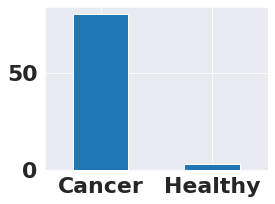

In [26]:
reshaped_proteome.Type.value_counts().plot(kind='bar',figsize=(4,3),rot=0)

### There is an imbalance in the 2 classes in this dataset

### The distribution of fold change in proteins in the cancer samples

In [27]:
# we are choosing only cancer samples
cancer_proteome=reshaped_proteome.iloc[:-3,:-1]
cancer_proteome.shape

(80, 12553)

In [28]:
cancer_mean_list=cancer_proteome.mean().values.tolist()

In [29]:
cmean=cancer_proteome.mean()
cstd=cancer_proteome.std()

In [30]:
cmean.name='mean_cancer'
cstd.name='std_cancer'

In [31]:
cmean.mean(),cmean.median()

(-0.23071076190960774, -0.06951175507894736)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


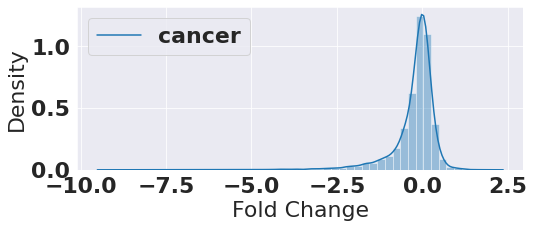

In [32]:
fig=plt.figure(figsize=(8,3))
cpobj=sns.distplot(cancer_mean_list,hist=True,axlabel="Fold Change")
cpobj.legend(['cancer'])
plt.show()

### Observation
### The distribution is negatively skewed and mean is less than median. The proportion of proteins with lower  abundance than the median level is high in the cancer samples

### The distribution of fold change in proteins in the healthy samples

In [33]:
# we are choosing healthy samples in the dataset
Healthy_proteome=reshaped_proteome.iloc[-3:,:-1]
Healthy_proteome.shape

(3, 12553)

In [34]:
healthy_mean_list=Healthy_proteome.mean().values.tolist()

In [35]:
hmean=Healthy_proteome.mean()
hstd=Healthy_proteome.std()

In [36]:
hmean.name='mean_healthy'
hstd.name='std_healthy'

In [37]:
hmean.mean(),hmean.median()

(-0.02895679693313174, -0.05106881610256419)

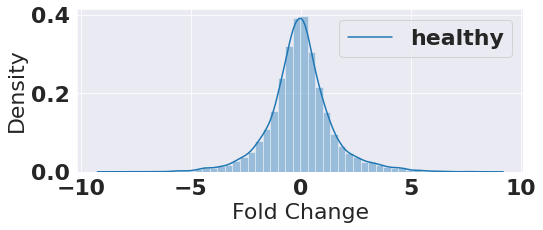

In [182]:
fig=plt.figure(figsize=(8,3))
hpobj=sns.distplot(healthy_mean_list,hist=True,axlabel="Fold Change")
hpobj.legend(['healthy'])
plt.show()

### Observation
### The distribution appears as Normal distribution

### superimposing both the cancer and healthy sample expression levels

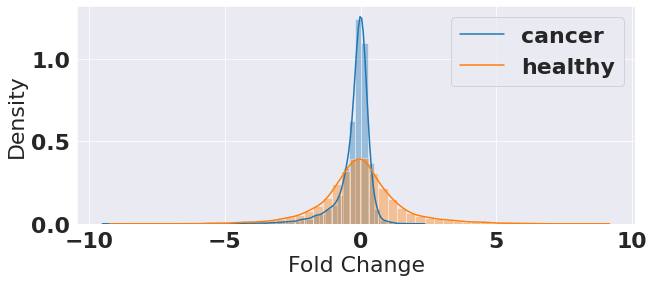

In [183]:
fig=plt.figure(figsize=(10,4))
g=sns.distplot(cancer_mean_list,hist=True,axlabel="Fold Change")
h=sns.distplot(healthy_mean_list,hist=True,axlabel="Fold Change")
plt.legend(['cancer','healthy'])
plt.show()

### Observation
### There is a shift in the abundance of proteins in cancer samples. It would be worthwhile to see proteins overexpressed in cancer as compared to healthy samples. iTRAQ measures protein abundance. The levels of protein can fall by proteolytic  processing and/or lower expression. The levels rise due to increased expression

In [132]:
proteome_foldchange_df=pd.concat([gene_name_df,cmean,cstd,hmean,hstd],axis=1,join='outer')

In [133]:
proteome_foldchange_df.head()

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy
RefSeq_accession_number,,,,,,
NP_958782,PLEC,plectin isoform 1,0.320062,0.992604,0.324758,0.447186
NP_958785,NaN,plectin isoform 1g,0.326656,0.995952,0.333827,0.448599
NP_958786,PLEC,plectin isoform 1a,0.326232,0.995815,0.331573,0.448458
NP_000436,NaN,plectin isoform 1c,0.323387,0.994313,0.331573,0.448458
NP_958781,NaN,plectin isoform 1e,0.326678,0.996615,0.337887,0.437526


In [153]:
proteome_foldchange_df['log_coeffvar_cncr']=np.log10(np.abs(proteome_foldchange_df.std_cancer/proteome_foldchange_df.mean_cancer))
proteome_foldchange_df['log_coeffvar_hlth']=np.log10(np.abs(proteome_foldchange_df.std_healthy/proteome_foldchange_df.mean_healthy))

In [154]:
proteome_foldchange_df.head()

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_958782,PLEC,plectin isoform 1,0.320062,0.992604,0.324758,0.447186,0.491541,0.138927
NP_958785,NaN,plectin isoform 1g,0.326656,0.995952,0.333827,0.448599,0.484148,0.128336
NP_958786,PLEC,plectin isoform 1a,0.326232,0.995815,0.331573,0.448458,0.484652,0.131143
NP_000436,NaN,plectin isoform 1c,0.323387,0.994313,0.331573,0.448458,0.487800,0.131143
NP_958781,NaN,plectin isoform 1e,0.326678,0.996615,0.337887,0.437526,0.484407,0.112232


### The changes in cancer would be due to overexpression of genes or repression of genes, and this will be reflected in the levels of the protein. Since absolute levels are not given, we  cannot compare the levels of protein in cancer and healthy samples directly. To compare cancer and healthy samples,we shall use the concept of Housekeeping genes. The expression of these genes is fairly constant and the proteins are present at constant levels. Prominently GAPDH, beta actin, beta tubulin are also used as loadng controls in western blots. A paper also cites that ribosome protein levels are fairly constant (Geiger T, Wehner A, Schaab C, Cox J, Mann M.  Mol Cell Proteomics. 2012 Mar;11(3))

## Housekeeping Genes

In [155]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_002037']#gapdh

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_002037,GAPDHL6,glyceraldehyde-3-phosphate dehydrogenase isofo...,-0.129247,0.848575,0.87411,0.291477,0.817269,-0.476961


In [156]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_001092']#beta actin

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_001092,ACTB,"actin, cytoplasmic 1",0.323812,0.741426,0.688672,0.308608,0.359774,-0.348605


In [157]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_821133']#beta tubulin

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_821133,TUBB,tubulin beta chain,0.257342,0.512544,-0.463977,0.347398,0.299221,-0.125669


In [158]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_057004']#S27 ribosomal protein

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_057004,RPS27L,40S ribosomal protein S27-like,0.181793,0.841232,-0.136627,0.427549,0.665338,0.495448


In [159]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_001017963']#HSP90

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_001017963,NaN,heat shock protein HSP 90-alpha isoform 1,0.054743,0.702963,-0.793373,0.09135,1.108606,-0.938771


In [160]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_001013']#S19 ribosomal protein

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_001013,NaN,40S ribosomal protein S19,0.155284,1.03732,-0.100351,0.329323,0.824785,0.5161


In [161]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_000966']#L11 ribosomal protein

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_000966,RPL11,60S ribosomal protein L11 isoform 1,0.158824,0.469693,-0.120288,0.383864,0.470897,0.503955


In [162]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_000968']#L13 ribosomal protein

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_000968,NaN,60S ribosomal protein L13 isoform 1,-0.245194,1.51742,-0.569403,1.148383,0.791595,0.304667


In [163]:
proteome_foldchange_df[proteome_foldchange_df.index=='NP_000960']#L5 ribosomal protein

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_000960,NaN,60S ribosomal protein L5,0.031497,0.870826,-0.774514,0.177887,1.441665,-0.638885


In [145]:
housekeeping=['NP_000968','NP_000966','NP_001013','NP_001017963','NP_057004','NP_821133','NP_001092','NP_002037','NP_000960']

In [146]:
house_names=['RPL13','RPL11','RPS19','HSP90','RPS27','TUBB','ACTB','GAPDH','RPL5']

In [147]:
housekeeping_cancer=cancer_proteome[housekeeping]

In [148]:
housekeeping_healthy=Healthy_proteome[housekeeping]

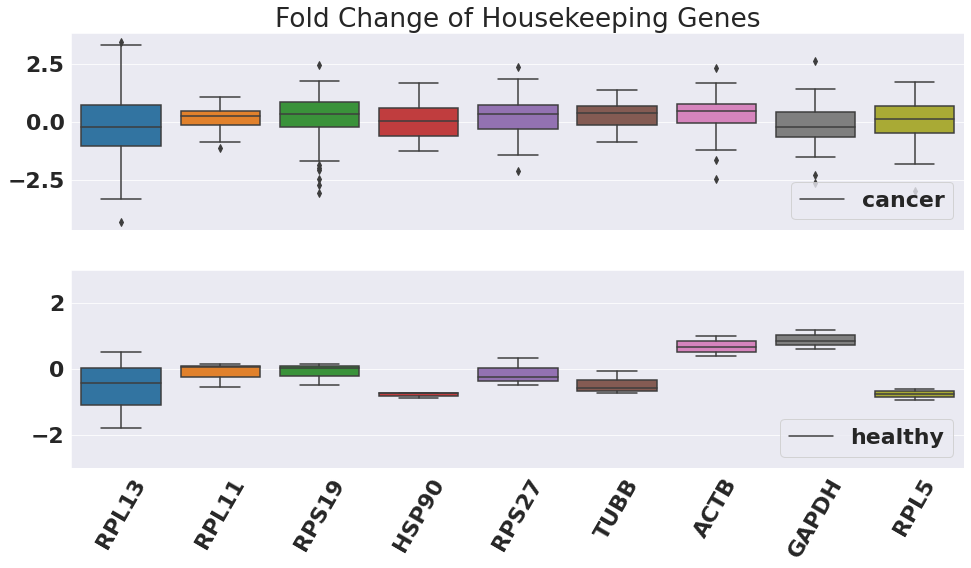

In [151]:
fig,axs=plt.subplots(2,sharex=True,figsize=(16,8))
ghk=sns.boxplot(data=housekeeping_cancer,ax=axs[0])
ghk.set_title('Fold Change of Housekeeping Genes')
ghk.legend(["cancer"],loc='lower right')
hhk=sns.boxplot(data=housekeeping_healthy,ax=axs[1])
hhk.legend(["healthy"],loc='lower right')
hhk.set_xticklabels(house_names,rotation=90)
hhk.set(ylim=(-3,3))
plt.xticks(rotation=60)
plt.show()

## Observation
### Ribosomal protein L11 (RPL11) and beta tubulin (TUBB) can be suitably used to study cancer related protein changes. We shall use beta tubulin, as we can co-relate our study with previous experimental studies 

### proteins with fold change greater than beta-tubulin 

In [165]:
cancer_overexpressed=proteome_foldchange_df[proteome_foldchange_df.mean_cancer>0.257342]
cancer_overexpressed.shape

(1426, 8)

## Observation
### only 1426 proteins out of 12553 proteins are present at higher levels than beta-tubulin

In [166]:
cancer_overexpressed.head()

,gene_symbol,gene_name,mean_cancer,std_cancer,mean_healthy,std_healthy,log_coeffvar_cncr,log_coeffvar_hlth
RefSeq_accession_number,,,,,,,,
NP_958782,PLEC,plectin isoform 1,0.320062,0.992604,0.324758,0.447186,0.491541,0.138927
NP_958785,NaN,plectin isoform 1g,0.326656,0.995952,0.333827,0.448599,0.484148,0.128336
NP_958786,PLEC,plectin isoform 1a,0.326232,0.995815,0.331573,0.448458,0.484652,0.131143
NP_000436,NaN,plectin isoform 1c,0.323387,0.994313,0.331573,0.448458,0.487800,0.131143
NP_958781,NaN,plectin isoform 1e,0.326678,0.996615,0.337887,0.437526,0.484407,0.112232


In [167]:
cancer_overexpressed['hlth_frm_TUBB']=cancer_overexpressed.mean_healthy-(-0.463977)

In [168]:
cancer_overexpressed['cncr_frm_TUBB']=cancer_overexpressed.mean_cancer-(0.257342)

In [169]:
cancer_overexpressed['fld_chng_cncr']=cancer_overexpressed['cncr_frm_TUBB']-cancer_overexpressed['hlth_frm_TUBB']

In [170]:
cancer_altered_df=pd.DataFrame(cancer_overexpressed.loc[:,('fld_chng_cncr')])
cancer_altered_df['comp_coeff_var']=cancer_overexpressed.log_coeffvar_cncr+cancer_overexpressed.log_coeffvar_hlth
cancer_altered_df.head()

,fld_chng_cncr,comp_coeff_var
RefSeq_accession_number,,
NP_958782,-0.726015,0.630469
NP_958785,-0.728490,0.612484
NP_958786,-0.726659,0.615794
NP_000436,-0.729504,0.618942
NP_958781,-0.732528,0.596639


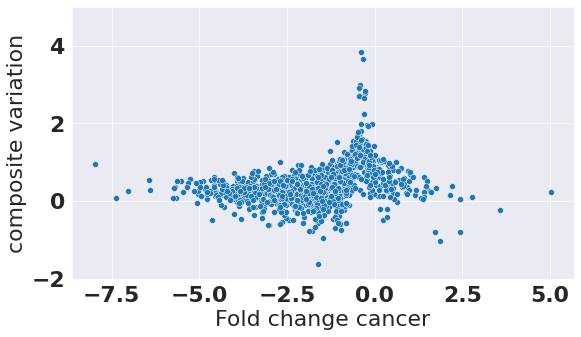

In [180]:
fig=plt.figure()
fig=sns.scatterplot(cancer_altered_df.fld_chng_cncr,cancer_altered_df.comp_coeff_var)
fig.set_ylim(-2,5)
fig.set_xlabel('Fold change cancer')
fig.set_ylabel('composite variation')
plt.show()

### few proteins are over-abundant in cancer as compared to healthy condition

In [184]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-4" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anubratadas/breast-cancer-proteomes-4


'https://jovian.ai/anubratadas/breast-cancer-proteomes-4'